## Estimating the winning market price
Estimating the price at which an item will be sold in an auction is one of the main everyday challenges in business. In this example we are asked to estimate a market price for a car and understand how it changes depending on car characteristics, market trends etc.

## Data
The data available at hand consists of approx. 5,000 cars that were sold via a b2b auction in 2018. The price shown in the table is the highest bid that was reached during the auction.

We have also extracted 8 criteria based on the equipment of car that we think might have a good impact on the value of a used car (e.g. leather seats, air condition, automatic gears, alloy wheels etc.). These features have been labelled feature1 to feature8 and are shown in the data below.

## Task at hand
We would like to find the main determinants of the value of a used car depending on the basic description and the 8 provided features.

### 1. What are the most important characteristics and features that determine the selling price of a used car? 


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

# Loading the original dataset...
data = pd.read_csv('data_pricing.csv')
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,02/01/2012,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,01/01/2018
1,BMW,M4,13929,317,04/01/2016,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,02/01/2018
2,BMW,320,183297,120,04/01/2012,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,02/01/2018
3,BMW,420,128035,135,07/01/2014,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,02/01/2018
4,BMW,425,97097,160,12/01/2014,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,04/01/2018


In [2]:
# Changing the registration_date and sold_at date string to a Timestamp...
data["registration_date"] = pd.to_datetime(data["registration_date"],format='%m/%d/%Y')
data["sold_at"] = pd.to_datetime(data["sold_at"],format='%m/%d/%Y')

# Adding a new column "age", the age of the car in months(at the time of 2018 auction)...
data['age'] = ((data.sold_at - data.registration_date)/np.timedelta64(1, 'M')).astype(int)

# Factorizing the categorical variables...
to_cat = ["model_key","fuel","paint_color","car_type","feature_1","feature_2","feature_3","feature_4","feature_5","feature_6","feature_7","feature_8"]
data[to_cat] = data[to_cat].apply(lambda x: pd.factorize(x)[0])

# Updated dataset
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,age
0,BMW,0,140411,100,2012-02-01,0,0,0,0,0,0,0,0,0,0,0,11300,2018-01-01,70
1,BMW,1,13929,317,2016-04-01,1,1,0,0,0,0,0,1,0,0,1,69700,2018-02-01,22
2,BMW,2,183297,120,2012-04-01,0,2,0,1,1,0,0,0,1,0,0,10200,2018-02-01,70
3,BMW,3,128035,135,2014-07-01,0,3,0,0,0,0,0,0,0,0,1,25100,2018-02-01,43
4,BMW,4,97097,160,2014-12-01,0,4,0,0,0,0,0,1,0,0,1,33400,2018-04-01,39


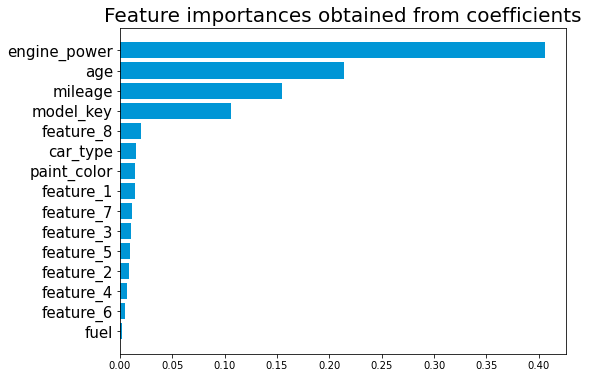

In [3]:
# Dataset Train-test split...
X = data.drop(["maker_key","registration_date","price","sold_at"], axis=1)
Y = data["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=42)

# Calculating the most important Features which affects the price of a car using gini importance...
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
importances = rf_model.feature_importances_
importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': importances}).sort_values(by='Importance', ascending=True)
fig, axs = plt.subplots(figsize=(8,6))
plt.barh(y=importances['Attribute'], width=importances['Importance'], color='#0096D6', height=0.8)
plt.title('Feature importances obtained from coefficients', size=20)
plt.yticks(size=15)
plt.show()

#### Important Features
The data above plot shows the most important features which influence the selling price of a used car are:
    1. Engine Power
    2. Age of the car (since the resgistration to the day of auction)
    3. Mileage
    4. Car Model
    5. Feature_8

### 2. How does the estimated value of a car change over time?
### Does a relative change in selling price over time differ significantly with respect to any of the car characteristics, e.g., color, price range or features?

Text(0, 0.5, 'Selling Price')

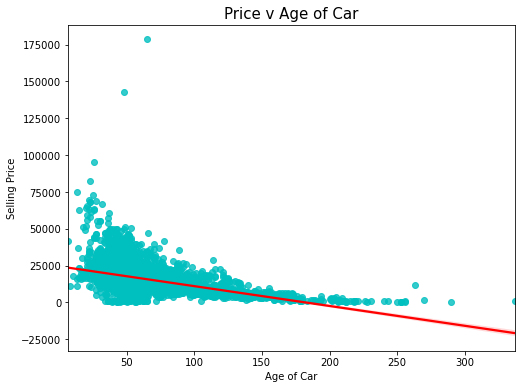

In [4]:
viz = pd.read_csv('data_pricing.csv')
viz['age'] = data['age']
viz["registration_date"] = data["registration_date"]
viz["sold_at"] = data["sold_at"]
fig, axs = plt.subplots(figsize=(8,6))
sns.regplot(x='age', y='price', data=viz,line_kws={'color':'red'},color='c')
plt.title('Price v Age of Car', size=15)
plt.xlabel('Age of Car')
plt.ylabel('Selling Price')

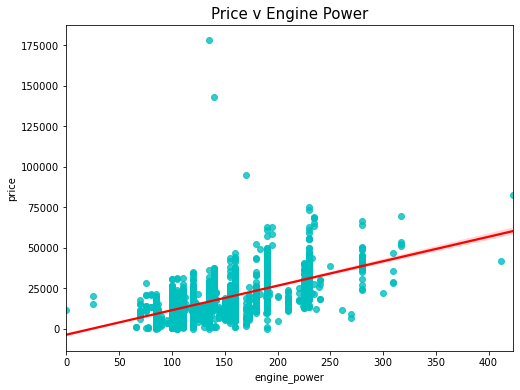

In [5]:
fig, axs = plt.subplots(figsize=(8,6))
plt.title('Price v Engine Power', size=15)
plt.xlabel('Engine Power')
plt.ylabel('Selling Price')
sns.regplot(x='engine_power', y='price', data=viz,line_kws={'color':'red'},color='c')

###### Price v Age for different fuel type of Cars

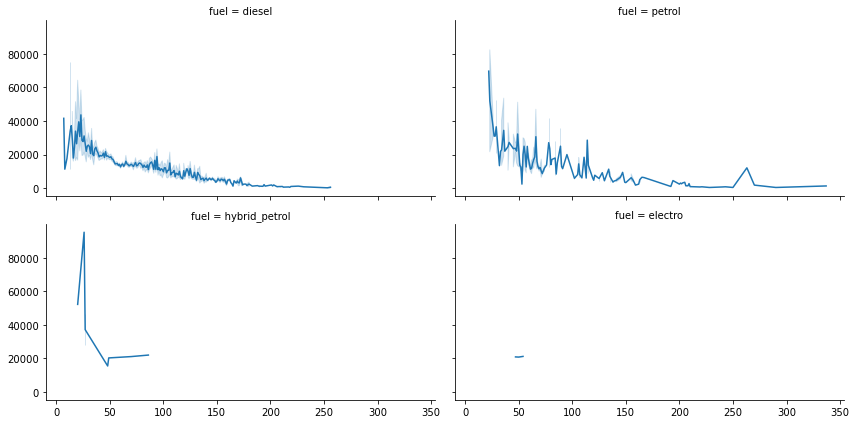

In [6]:
sns.FacetGrid(viz, col="fuel",col_wrap=2,height=3, aspect=2).map_dataframe(sns.lineplot, x="age", y="price")

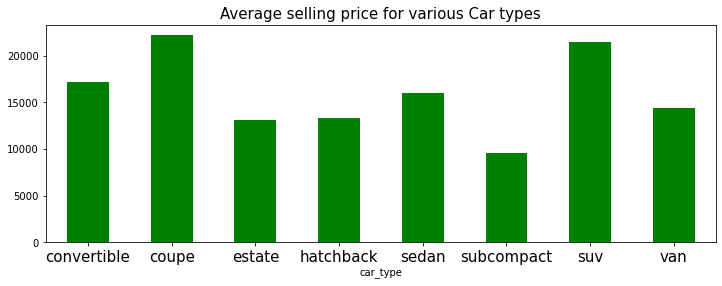

In [7]:
fig, axs = plt.subplots(figsize=(12, 4))
plt.title("Average selling price for various Car types", size=15)
plt.xticks(size=15)
viz.groupby(viz["car_type"])["price"].mean().plot(kind='bar', rot=0, ax=axs, color="green")

Text(0.5, 0, 'Fuel type')

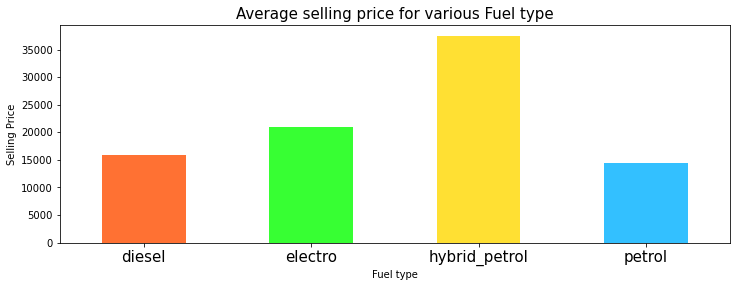

In [8]:
fig, axs = plt.subplots(figsize=(12, 4))
plt.xticks(size=15)
plt.title('Average selling price for various Fuel type', size=15)
plt.ylabel('Selling Price')
viz.groupby(viz["fuel"])["price"].mean().plot(kind='bar', rot=0, ax=axs, color=['#FF7133', '#37FF33', '#FFE033', '#33C0FF'])
plt.xlabel('Fuel type')

### Are there any statistically significant seasonality patterns in pricing, e.g. certain car types being more expensive in summer than winter?
###### The below visualization represents the trend in the average price of cars sold in the each month of the auction year.

Text(0, 0.5, 'Selling Price')

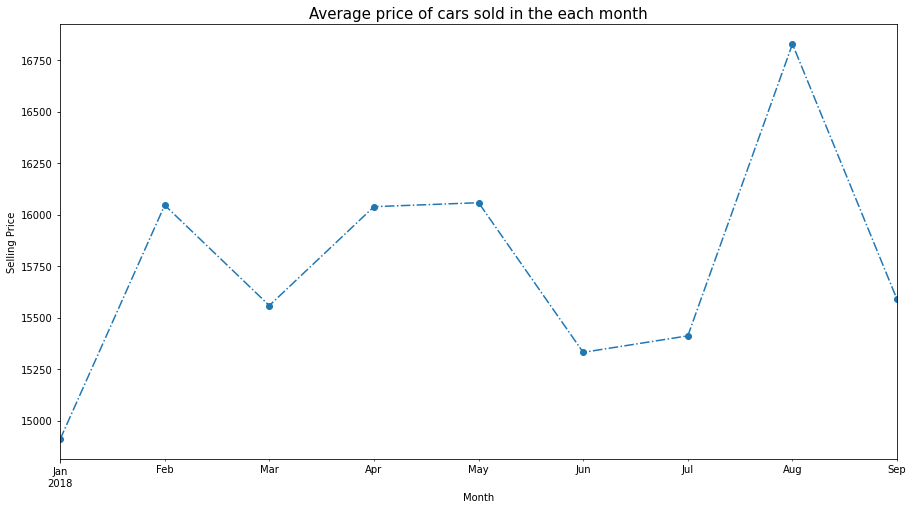

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Average price of cars sold in the each month', size=15)
viz.groupby([viz['sold_at'].dt.to_period('M')]).mean()['price'].plot(ax=ax, marker ='o', ls='-.')
plt.xlabel('Month')
plt.ylabel('Selling Price')

Text(0, 0.5, 'Selling Price')

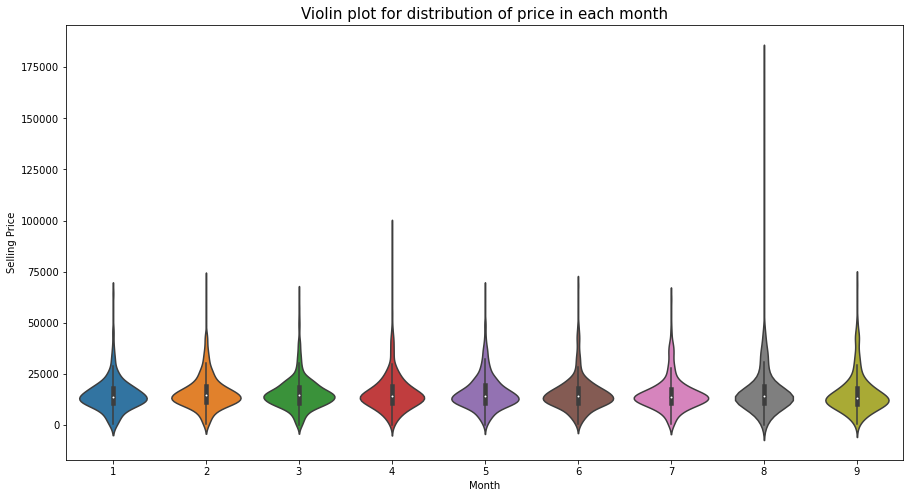

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Violin plot for distribution of price in each month', size=15)
sns.violinplot(x = viz['sold_at'].dt.month, y = "price",data = viz)
plt.xlabel('Month')
plt.ylabel('Selling Price')

###### Pattern in the average price of cars sold for differnt fuel type engines.

Text(0, 0.5, 'Selling Price')

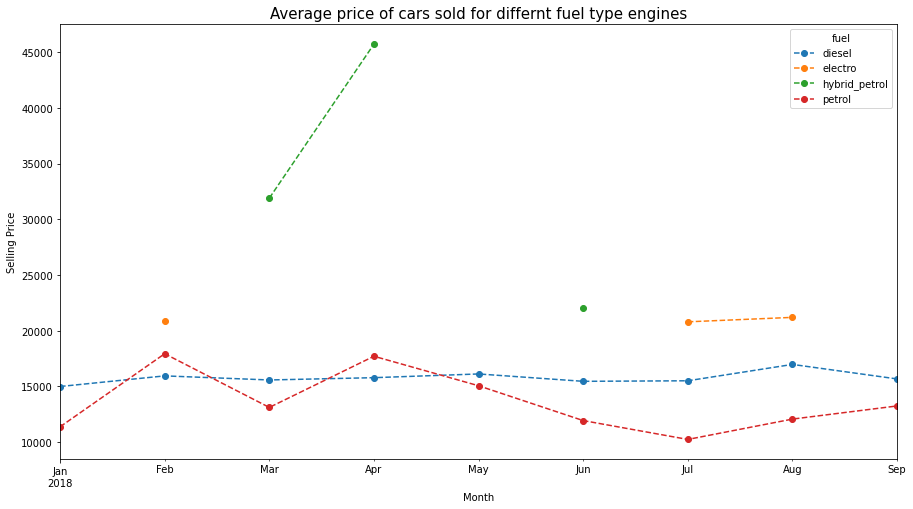

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Average price of cars sold for differnt fuel type engines', size=15)
viz.groupby([viz['sold_at'].dt.to_period('M'),'fuel']).mean()['price'].unstack().plot(ax=ax, marker ='o', ls='--')
plt.xlabel('Month')
plt.ylabel('Selling Price')

###### Pattern in the average price of cars sold for differnt types of cars.

Text(0, 0.5, 'Selling Price')

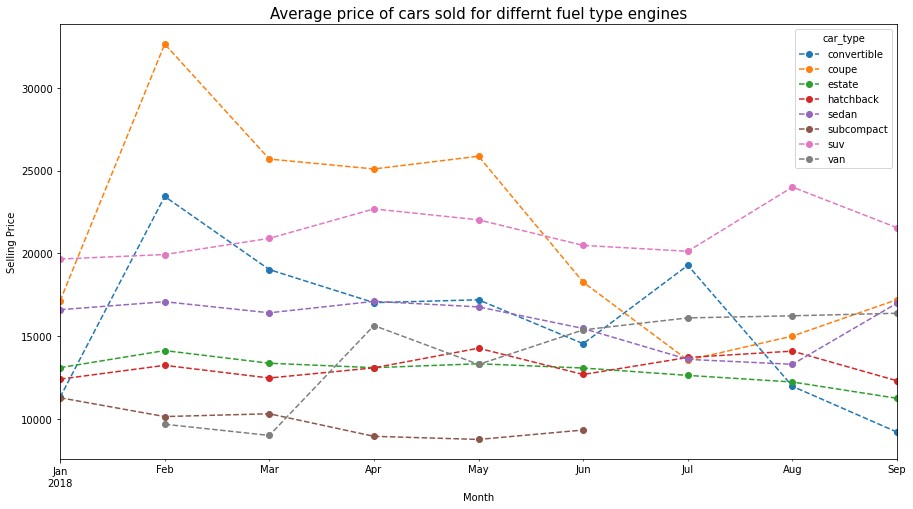

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Average price of cars sold for differnt fuel type engines', size=15)
viz.groupby([viz['sold_at'].dt.to_period('M'),'car_type']).mean()['price'].unstack().plot(ax=ax, marker ='o', ls='--')
plt.xlabel('Month')
plt.ylabel('Selling Price')

### 3. Assume you need a car for a year (buy it now and sell in 1 year) and will drive approx. 10,000 miles during this time frame. You want to spend at least \\$20k.

What particular car from this data set would you buy (selling price has to be at least \\$20k at the moment of purchase) if you want to minimize the loss in absolute value in \\$ when you sell it. (Loss in value is \\$ defined as: Price at purchase – price after a year).

In [13]:
# Getting the full set of data 'X' for prediction after a year according to the contrains in the question...
X_year_ahead = X

# As we need the car only for one year, increasing the age by 12 months...
X_year_ahead['age'] = X_year_ahead['age'].apply(lambda x: x + 12)

# As we want to drive the car approximately 10,000 miles, increasing the mileage accordingly...
X_year_ahead['mileage'] = X_year_ahead['mileage'].apply(lambda x: x + 10000)
df = pd.read_csv('data_pricing.csv')
df = df.drop(['registration_date','feature_1','feature_3','feature_4','feature_5','feature_6','feature_7'], axis=1)

# Predicting the price...
df['predicted_price'] = rf_model.predict(X_year_ahead)

# As we are to invest atleast $20k, filtering the data...
df = df.loc[(df.price >= 20000)]

# Calculating absolute loss...
df['absolute_loss'] = df['price'] - df['predicted_price']
df.sort_values(by='absolute_loss', ascending=True).head(10)

,maker_key,model_key,mileage,engine_power,fuel,paint_color,car_type,feature_2,feature_8,price,sold_at,predicted_price,absolute_loss
3787,BMW,X3,57435,135,diesel,silver,suv,False,True,26700,07/01/2018,54869.0,-28169.0
4648,BMW,X4,53055,140,diesel,black,suv,True,True,23800,08/01/2018,49839.0,-26039.0
2668,BMW,320 Gran Turismo,55142,135,diesel,blue,sedan,False,True,22600,02/01/2018,48426.0,-25826.0
3891,BMW,X4,95351,140,diesel,grey,suv,True,True,28600,02/01/2018,51424.0,-22824.0
4142,BMW,X4,103064,140,diesel,grey,suv,True,True,30500,06/01/2018,50320.0,-19820.0
4168,BMW,X3,63507,135,diesel,grey,suv,False,True,22600,04/01/2018,42133.0,-19533.0
4450,BMW,X4,73719,140,diesel,grey,suv,True,True,33900,06/01/2018,49734.0,-15834.0
4178,BMW,X4,62592,140,diesel,white,suv,True,True,35900,08/01/2018,50598.0,-14698.0
4003,BMW,X3,24175,135,diesel,beige,suv,True,True,22600,03/01/2018,37133.0,-14533.0
4644,BMW,X4,54270,140,diesel,blue,suv,False,True,34500,08/01/2018,48591.0,-14091.0


#### Which car to buy?
The following are some good options for BMW cars which we can look forward to buying, if we are to minimize the loss in it's absolute price value.
   * BMW 320 Gran Turismo
   * BMW 420 Gran Coupé
   * BMW 420
   * BMW X3
   * BMW X4
   * BMW X5

### 4. The out-of-sample accuracy metric for the model used to answer the above questions.

The out-of-sample accuracy metric for the Random Forest Regression model is <b>R<sup>2</sup></b> score.

In [14]:
#The model's Training accuracy 
print('Random Forest Model score on Training data:', rf_model.score(X_train, Y_train))
#The model's Out-of-Sample accuracy 
print('Random Forest Model score on Out-of-Sample data:', r2_score(Y_test, rf_model.predict(X_test)))

Random Forest Model score on Training data: 0.9655275244011225
Random Forest Model score on Out-of-Sample data: 0.8309387385801646


--------------------------------------------------------------------------------------- END OF NOTEBOOK --------------------------------------------------------------------------------------------